In [1]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import math
import sys
from scipy.stats import spearmanr

# from sklearn.impute import SimpleImputer
# impNumeric = SimpleImputer(missing_values=np.nan, strategy='mean')
# impCategorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

# explicitly require this experimental feature
from sklearn.experimental import enable_iterative_imputer
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer
impIterative = IterativeImputer(missing_values=np.nan, sample_posterior=True, imputation_order='random')

from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
url = "124 variable K-8 education dataset.csv"

In [3]:
original_dataset=read_csv(url)

In [4]:
original_dataset

,Unnamed: 0,CHILDID,KURBAN_R,GENDER,RACE,C1R4RSCL,C1R4RPF,C1R4MSCL,C1R4MPF,C1RGSCAL,...,A4TXPE,A5TXPE,B1HGHSTD,B2HGHSTD,B4KHGHST,B4HGHSTD,B5HGHSTD,S2PUBLIC,S4PUBLIC,S6PUBLIC
0,1,0001001C,1.0,2,1,36.58,1.0,39.54,3.0,33.822,...,2.0,NaN,1.0,1.0,NaN,2.0,NaN,1.0,NaN,NaN
1,2,0001002C,1.0,2,1,50.82,3.0,44.44,3.0,38.147,...,2.0,3.0,1.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0
2,3,0001003C,1.0,2,1,40.68,-9.0,28.57,2.0,28.108,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN
3,4,0001004C,1.0,1,1,34.72,1.0,26.62,1.0,25.865,...,2.0,3.0,1.0,1.0,NaN,3.0,1.0,1.0,1.0,NaN
4,5,0001005C,1.0,2,1,38.28,1.0,40.88,3.0,38.993,...,3.0,3.0,1.0,1.0,NaN,3.0,1.0,1.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21404,21405,3116024C,1.0,1,3,23.47,0.0,14.30,0.0,15.256,...,3.0,NaN,3.0,3.0,NaN,4.0,NaN,1.0,NaN,1.0
21405,21406,5213040C,NaN,2,4,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.0,NaN
21406,21407,5245040C,NaN,1,2,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,NaN,NaN,NaN,2.0,1.0,NaN,1.0,NaN
21407,21408,5245041C,NaN,1,-9,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,NaN,NaN,NaN,3.0,2.0,NaN,1.0,1.0


### Number of Non-NA Values

In [5]:
# Number of Non-NA values in column C4R4MPF (First Grade RC4 MATH HIGHEST PROF LVL MASTERED)
print('Number of Non-NA values in column C4R4MPF:', original_dataset['C4R4MPF'].count())
print('Number of Non-NA values in column C5R4MPF:', original_dataset['C5R4MPF'].count())
print('Number of Non-NA values in column C6R4MPF:', original_dataset['C6R4MPF'].count())
print('Number of Non-NA values in column C7R4MPF:', original_dataset['C7R4MPF'].count())

Number of Non-NA values in column C4R4MPF: 16683
Number of Non-NA values in column C5R4MPF: 14415
Number of Non-NA values in column C6R4MPF: 11294
Number of Non-NA values in column C7R4MPF: 9307


### Number of NA Values

In [6]:
print('Number of NA values in column C4R4MPF:', original_dataset['C4R4MPF'].isna().sum())
print('Number of NA values in column C5R4MPF:', original_dataset['C5R4MPF'].isna().sum())
print('Number of NA values in column C6R4MPF:', original_dataset['C6R4MPF'].isna().sum())
print('Number of NA values in column C7R4MPF:', original_dataset['C7R4MPF'].isna().sum())

Number of NA values in column C4R4MPF: 4726
Number of NA values in column C5R4MPF: 6994
Number of NA values in column C6R4MPF: 10115
Number of NA values in column C7R4MPF: 12102


## Determining the Best Y-Variable

In [7]:
new_dataset = original_dataset.copy()
new_dataset = new_dataset.drop(columns=['CHILDID', 'RACE', 'Unnamed: 0'])
new_dataset

,KURBAN_R,GENDER,C1R4RSCL,C1R4RPF,C1R4MSCL,C1R4MPF,C1RGSCAL,C2R4RSCL,C2R4RPF,C2R4MSCL,...,A4TXPE,A5TXPE,B1HGHSTD,B2HGHSTD,B4KHGHST,B4HGHSTD,B5HGHSTD,S2PUBLIC,S4PUBLIC,S6PUBLIC
0,1.0,2,36.58,1.0,39.54,3.0,33.822,49.37,3.0,50.10,...,2.0,NaN,1.0,1.0,NaN,2.0,NaN,1.0,NaN,NaN
1,1.0,2,50.82,3.0,44.44,3.0,38.147,83.50,6.0,58.93,...,2.0,3.0,1.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0
2,1.0,2,40.68,-9.0,28.57,2.0,28.108,40.41,-9.0,32.81,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN
3,1.0,1,34.72,1.0,26.62,1.0,25.865,42.06,2.0,34.37,...,2.0,3.0,1.0,1.0,NaN,3.0,1.0,1.0,1.0,NaN
4,1.0,2,38.28,1.0,40.88,3.0,38.993,50.40,2.0,38.86,...,3.0,3.0,1.0,1.0,NaN,3.0,1.0,1.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21404,1.0,1,23.47,0.0,14.30,0.0,15.256,31.41,0.0,17.49,...,3.0,NaN,3.0,3.0,NaN,4.0,NaN,1.0,NaN,1.0
21405,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.0,NaN
21406,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,NaN,NaN,NaN,2.0,1.0,NaN,1.0,NaN
21407,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,NaN,NaN,NaN,3.0,2.0,NaN,1.0,1.0


### Remove the columns with the most NA values

In [8]:
def remove_highest_empties(df):
    length_of_df = len(df)
    
    for column_name, _ in df.iteritems():
        if (df[column_name].isna().sum() > (length_of_df / 2)):
            df = df.drop(columns=[column_name])
    return df

In [9]:
new_dataset = remove_highest_empties(new_dataset)
new_dataset

,KURBAN_R,GENDER,C1R4RSCL,C1R4RPF,C1R4MSCL,C1R4MPF,C1RGSCAL,C2R4RSCL,C2R4RPF,C2R4MSCL,...,P6LOWCST,A2TXPE,A4TXPE,A5TXPE,B1HGHSTD,B2HGHSTD,B4HGHSTD,B5HGHSTD,S2PUBLIC,S6PUBLIC
0,1.0,2,36.58,1.0,39.54,3.0,33.822,49.37,3.0,50.10,...,NaN,3.0,2.0,NaN,1.0,1.0,2.0,NaN,1.0,NaN
1,1.0,2,50.82,3.0,44.44,3.0,38.147,83.50,6.0,58.93,...,3.0,3.0,2.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0
2,1.0,2,40.68,-9.0,28.57,2.0,28.108,40.41,-9.0,32.81,...,NaN,3.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN
3,1.0,1,34.72,1.0,26.62,1.0,25.865,42.06,2.0,34.37,...,NaN,3.0,2.0,3.0,1.0,1.0,3.0,1.0,1.0,NaN
4,1.0,2,38.28,1.0,40.88,3.0,38.993,50.40,2.0,38.86,...,NaN,3.0,3.0,3.0,1.0,1.0,3.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21404,1.0,1,23.47,0.0,14.30,0.0,15.256,31.41,0.0,17.49,...,3.0,2.0,3.0,NaN,3.0,3.0,4.0,NaN,1.0,1.0
21405,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
21406,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,4.0,NaN,NaN,2.0,1.0,NaN,NaN
21407,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,4.0,4.0,NaN,NaN,3.0,2.0,NaN,1.0


### Remove the NA values from the Y-Variable

### Count the Number of NA values in the rest of the dataset

In [10]:
def count_the_empties(df):
    for column_name, _ in df.iteritems():
        print('Number of NA values in column ' + column_name + ':', original_dataset[column_name].isna().sum())

In [11]:
count_the_empties(new_dataset)

Number of NA values in column KURBAN_R: 149
Number of NA values in column GENDER: 0
Number of NA values in column C1R4RSCL: 2283
Number of NA values in column C1R4RPF: 2283
Number of NA values in column C1R4MSCL: 2283
Number of NA values in column C1R4MPF: 2283
Number of NA values in column C1RGSCAL: 2283
Number of NA values in column C2R4RSCL: 1492
Number of NA values in column C2R4RPF: 1492
Number of NA values in column C2R4MSCL: 1492
Number of NA values in column C2R4MPF: 1492
Number of NA values in column C2RGSCAL: 1492
Number of NA values in column C4R4RSCL: 4726
Number of NA values in column C4R4RPF: 4726
Number of NA values in column C4R4MSCL: 4726
Number of NA values in column C4R4MPF: 4726
Number of NA values in column C4RGSCAL: 4726
Number of NA values in column C5R4RSCL: 6994
Number of NA values in column C5R4RPF: 6994
Number of NA values in column C5R4MSCL: 6994
Number of NA values in column C5R4MPF: 6994
Number of NA values in column C5R2SSCL: 6994
Number of NA values in c

### Determining the Correlation Between Values

In [12]:
test_df = new_dataset.copy()
test_df

,KURBAN_R,GENDER,C1R4RSCL,C1R4RPF,C1R4MSCL,C1R4MPF,C1RGSCAL,C2R4RSCL,C2R4RPF,C2R4MSCL,...,P6LOWCST,A2TXPE,A4TXPE,A5TXPE,B1HGHSTD,B2HGHSTD,B4HGHSTD,B5HGHSTD,S2PUBLIC,S6PUBLIC
0,1.0,2,36.58,1.0,39.54,3.0,33.822,49.37,3.0,50.10,...,NaN,3.0,2.0,NaN,1.0,1.0,2.0,NaN,1.0,NaN
1,1.0,2,50.82,3.0,44.44,3.0,38.147,83.50,6.0,58.93,...,3.0,3.0,2.0,3.0,1.0,1.0,2.0,1.0,1.0,1.0
2,1.0,2,40.68,-9.0,28.57,2.0,28.108,40.41,-9.0,32.81,...,NaN,3.0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN
3,1.0,1,34.72,1.0,26.62,1.0,25.865,42.06,2.0,34.37,...,NaN,3.0,2.0,3.0,1.0,1.0,3.0,1.0,1.0,NaN
4,1.0,2,38.28,1.0,40.88,3.0,38.993,50.40,2.0,38.86,...,NaN,3.0,3.0,3.0,1.0,1.0,3.0,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21404,1.0,1,23.47,0.0,14.30,0.0,15.256,31.41,0.0,17.49,...,3.0,2.0,3.0,NaN,3.0,3.0,4.0,NaN,1.0,1.0
21405,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
21406,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,4.0,NaN,NaN,2.0,1.0,NaN,NaN
21407,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,4.0,4.0,NaN,NaN,3.0,2.0,NaN,1.0


In [13]:
# def find_correlation(df):
#     corr_df = df.corr()
#     average_correlation = {}
    
#     for column_name, _ in corr_df.iteritems():
#         avg = np.mean(corr_df[column_name])
#         average_correlation[column_name] = average_correlation.get(column_name, avg)
# #         print('The average correlation for ' + column_name + ' is', avg)
    
#     key_list = list(average_correlation.keys())
#     val_list = list(average_correlation.values())
    
#     while len(average_correlation) > 20:
#         position = val_list.index(min(average_correlation.values()))
#         key = key_list[position]
#         average_correlation.pop(key, None)
        
#     return average_correlation

In [14]:
def find_correlation(df):
    return df.corr()

In [15]:
corr_dict = find_correlation(test_df)
corr_dict

,KURBAN_R,GENDER,C1R4RSCL,C1R4RPF,C1R4MSCL,C1R4MPF,C1RGSCAL,C2R4RSCL,C2R4RPF,C2R4MSCL,...,P6LOWCST,A2TXPE,A4TXPE,A5TXPE,B1HGHSTD,B2HGHSTD,B4HGHSTD,B5HGHSTD,S2PUBLIC,S6PUBLIC
KURBAN_R,1.000000,0.001080,0.086977,0.005200,0.037023,0.016527,0.136125,0.064288,0.020120,0.039733,...,0.019410,-0.036890,-0.030581,-0.061003,0.052081,0.058808,0.030602,0.016730,-0.108406,-0.096615
GENDER,0.001080,1.000000,0.042310,0.030792,-0.005530,0.046802,-0.014329,0.056820,0.049697,-0.018094,...,-0.012396,-0.001982,-0.009580,-0.009257,0.002446,-0.003124,-0.004731,-0.003580,0.004926,0.006962
C1R4RSCL,0.086977,0.042310,1.000000,0.364707,0.717506,0.324739,0.720065,0.814273,0.321037,0.614043,...,0.113630,-0.052863,-0.016942,0.007366,-0.002725,-0.006974,0.000737,0.024091,0.110775,0.096340
C1R4RPF,0.005200,0.030792,0.364707,1.000000,0.301013,0.146601,0.256507,0.283790,0.153050,0.253277,...,0.046774,-0.016872,0.005250,0.005971,0.001857,0.004366,-0.009795,0.003081,0.051295,0.046900
C1R4MSCL,0.037023,-0.005530,0.717506,0.301013,1.000000,0.435133,0.662224,0.645928,0.293533,0.809762,...,0.093266,-0.034774,0.001484,0.020821,0.004930,0.008002,-0.002679,0.009970,0.122532,0.110635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B2HGHSTD,0.058808,-0.003124,-0.006974,0.004366,0.008002,0.007614,0.021481,-0.018069,-0.004862,0.006802,...,0.004872,-0.016644,0.004673,-0.009772,0.970187,1.000000,0.043823,0.036922,-0.091738,-0.029650
B4HGHSTD,0.030602,-0.004731,0.000737,-0.009795,-0.002679,-0.014008,0.010883,-0.005276,0.001700,-0.010430,...,0.005826,-0.039322,-0.016048,-0.013896,0.040803,0.043823,1.000000,0.089371,-0.066280,-0.068088
B5HGHSTD,0.016730,-0.003580,0.024091,0.003081,0.009970,0.010586,0.027764,0.017217,0.025226,0.009540,...,0.006787,-0.059077,-0.035115,0.118026,0.041687,0.036922,0.089371,1.000000,-0.084010,-0.086585
S2PUBLIC,-0.108406,0.004926,0.110775,0.051295,0.122532,0.049883,0.116346,0.095171,0.043436,0.098146,...,0.043050,-0.034385,-0.040536,0.007716,-0.086924,-0.091738,-0.066280,-0.084010,1.000000,0.359379


In [58]:
corr_dict['C6R4MPF']

KURBAN_R    0.003715
GENDER     -0.048917
C1R4RSCL    0.146629
C1R4RPF     0.072094
C1R4MSCL    0.221495
              ...   
B2HGHSTD   -0.000574
B4HGHSTD    0.000122
B5HGHSTD    0.010041
S2PUBLIC    0.034806
S6PUBLIC    0.029326
Name: C6R4MPF, Length: 94, dtype: float64

In [83]:
mask = (corr_dict['C6R4MPF'] > 0.3)
mask

KURBAN_R    False
GENDER      False
C1R4RSCL    False
C1R4RPF     False
C1R4MSCL    False
            ...  
B2HGHSTD    False
B4HGHSTD    False
B5HGHSTD    False
S2PUBLIC    False
S6PUBLIC    False
Name: C6R4MPF, Length: 94, dtype: bool

In [85]:
corr_dict['C6R4MPF'][mask]

C5R4MSCL    0.312657
C6R4MSCL    0.390283
C6R4MPF     1.000000
Name: C6R4MPF, dtype: float64

In [82]:
corr_dict['C6R4MPF'].loc[corr_dict['C6R4MPF'] > 0.3]

C5R4MSCL    0.312657
C6R4MSCL    0.390283
C6R4MPF     1.000000
Name: C6R4MPF, dtype: float64

In [74]:
mask.index.values

array(['KURBAN_R', 'GENDER', 'C1R4RSCL', 'C1R4RPF', 'C1R4MSCL', 'C1R4MPF',
       'C1RGSCAL', 'C2R4RSCL', 'C2R4RPF', 'C2R4MSCL', 'C2R4MPF',
       'C2RGSCAL', 'C4R4RSCL', 'C4R4RPF', 'C4R4MSCL', 'C4R4MPF',
       'C4RGSCAL', 'C5R4RSCL', 'C5R4RPF', 'C5R4MSCL', 'C5R4MPF',
       'C5R2SSCL', 'C6R4RSCL', 'C6R4RPF', 'C6R4MSCL', 'C6R4MPF',
       'C6R2SSCL', 'T1RARSLI', 'T1RARSMA', 'T1RARSGE', 'T2RARSLI',
       'T2RARSMA', 'T2RARSGE', 'T4ARSLIT', 'T4ARSMAT', 'T4ARSGEN',
       'T5ARSLIT', 'T5ARSMAT', 'T5ARSSCI', 'T6ARSLIT', 'T6ARSMAT',
       'T6ARSSCI', 'P1HMEMP', 'P1HDEMP', 'P1HMRACE', 'P1HDRACE',
       'P1HTOTAL', 'P2HTOTAL', 'P2HMRACE', 'P2HDRACE', 'P2FSSTAT',
       'WKMOMED', 'WKDADED', 'WKINCOME', 'P4HMRACE', 'P4HDRACE',
       'P4HTOTAL', 'W1MOMED', 'W1DADED', 'W1INCCAT', 'P5FSSTAT',
       'P5HMRACE', 'P5HDRACE', 'P5HTOTAL', 'W3MOMED', 'W3DADED',
       'W3INCCAT', 'P6FSSTAT', 'P6HMEMP', 'P6HDEMP', 'P6HMRACE',
       'P6HDRACE', 'P6HTOTAL', 'W5MOMED', 'W5DADED', 'W5INCCAT',
       

In [16]:
# for key, value in avg_corr_dict.items():
#     print('Key: ' + key + ' Value:', value)

In [17]:
def find_covariance(df):
    return df.cov()

In [18]:
cov_df = find_covariance(test_df)
cov_df

,KURBAN_R,GENDER,C1R4RSCL,C1R4RPF,C1R4MSCL,C1R4MPF,C1RGSCAL,C2R4RSCL,C2R4RPF,C2R4MSCL,...,P6LOWCST,A2TXPE,A4TXPE,A5TXPE,B1HGHSTD,B2HGHSTD,B4HGHSTD,B5HGHSTD,S2PUBLIC,S6PUBLIC
KURBAN_R,0.569913,0.000459,0.911584,0.009721,0.280666,0.025848,0.999967,0.831551,0.046570,0.381617,...,0.017966,-0.045700,-0.032604,-0.074686,0.112186,0.122477,0.034767,0.017995,-0.051163,-0.048411
GENDER,0.000459,0.316480,0.296704,0.038515,-0.028050,0.048977,-0.070432,0.497313,0.077837,-0.117591,...,-0.007408,-0.001659,-0.006660,-0.007389,0.003500,-0.004399,-0.003507,-0.002507,0.001745,0.002248
C1R4RSCL,0.911584,0.296704,192.361478,12.513194,99.832245,9.321586,97.083958,192.549701,13.576286,108.128369,...,1.891075,-1.197249,-0.325048,0.155878,-0.105583,-0.262950,0.015002,0.455774,0.929019,0.888095
C1R4RPF,0.009721,0.038515,12.513194,6.119683,7.470271,0.750579,6.168505,12.008698,1.158208,7.981092,...,0.136378,-0.069268,0.018341,0.023148,0.012923,0.029883,-0.036215,0.010654,0.079888,0.075788
C1R4MSCL,0.280666,-0.028050,99.832245,7.470271,100.640548,9.034509,64.581442,110.649970,8.992453,103.298216,...,1.112074,-0.575598,0.020758,0.328183,0.139316,0.221941,-0.039718,0.140503,0.774396,0.737153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B2HGHSTD,0.122477,-0.004399,-0.262950,0.029883,0.221941,0.043610,0.571159,-0.837346,-0.040945,0.237525,...,0.015933,-0.075168,0.017277,-0.041035,7.286979,7.568217,0.179298,0.134555,-0.160279,-0.052817
B4HGHSTD,0.034767,-0.003507,0.015002,-0.036215,-0.039718,-0.043436,0.155782,-0.131845,0.007720,-0.193403,...,0.009603,-0.095871,-0.031830,-0.031028,0.168354,0.179298,2.198336,0.178601,-0.050091,-0.055669
B5HGHSTD,0.017995,-0.002507,0.455774,0.010654,0.140503,0.030752,0.370185,0.395350,0.104729,0.168077,...,0.010891,-0.128859,-0.066054,0.260853,0.156612,0.134555,0.178601,1.961008,-0.060744,-0.078956
S2PUBLIC,-0.051163,0.001745,0.929019,0.079888,0.774396,0.065126,0.692914,0.997225,0.083664,0.784568,...,0.028063,-0.034836,-0.029672,0.006542,-0.152332,-0.160279,-0.050091,-0.060744,0.381869,0.133796


## Creating a new dataset with the columns we're using

In [19]:
dataset = original_dataset[["P4CMPEDU","P5CMPEDU","P6CMPEDU","C4R4MPF","C5R4MPF","W1INCCAT","W5INCCAT","W8INCCAT","WKMOMED","WKDADED","P1HMEMP","P1HDEMP","P7HMEMP","P7HDEMP","C6R4MPF"]]

In [20]:
dataset.shape

(21409, 15)

In [21]:
# Number of Non-NA values in each column
dataset.count()

P4CMPEDU    15626
P5CMPEDU    13489
P6CMPEDU    10996
C4R4MPF     16683
C5R4MPF     14415
W1INCCAT    16015
W5INCCAT    10996
W8INCCAT     8809
WKMOMED     20141
WKDADED     20141
P1HMEMP     18097
P1HDEMP     18097
P7HMEMP      8809
P7HDEMP      8809
C6R4MPF     11294
dtype: int64

In [22]:
# Number of NA values in each column
dataset.isna().sum()

P4CMPEDU     5783
P5CMPEDU     7920
P6CMPEDU    10413
C4R4MPF      4726
C5R4MPF      6994
W1INCCAT     5394
W5INCCAT    10413
W8INCCAT    12600
WKMOMED      1268
WKDADED      1268
P1HMEMP      3312
P1HDEMP      3312
P7HMEMP     12600
P7HDEMP     12600
C6R4MPF     10115
dtype: int64

In [23]:
dataset.groupby('C6R4MPF').size()

C6R4MPF
-9.0     413
 1.0       1
 2.0       4
 3.0     135
 4.0     578
 5.0    1726
 6.0    3660
 7.0    3169
 8.0    1419
 9.0     189
dtype: int64

In [24]:
cleandf=dataset.copy().dropna(subset=["C6R4MPF"])

In [25]:
cleandf.shape

(11294, 15)

In [26]:
cleandf.isna().sum()

P4CMPEDU    1022
P5CMPEDU    1257
P6CMPEDU     815
C4R4MPF      304
C5R4MPF      223
W1INCCAT     860
W5INCCAT     815
W8INCCAT    2916
WKMOMED      450
WKDADED      450
P1HMEMP     1507
P1HDEMP     1507
P7HMEMP     2916
P7HDEMP     2916
C6R4MPF        0
dtype: int64

In [27]:
print(cleandf.groupby('C6R4MPF').size())

C6R4MPF
-9.0     413
 1.0       1
 2.0       4
 3.0     135
 4.0     578
 5.0    1726
 6.0    3660
 7.0    3169
 8.0    1419
 9.0     189
dtype: int64


In [28]:
dataset= cleandf[cleandf["C6R4MPF"]>4]
print(dataset.groupby('C6R4MPF').size())

C6R4MPF
5.0    1726
6.0    3660
7.0    3169
8.0    1419
9.0     189
dtype: int64


In [29]:
dataset.shape

(10163, 15)

In [30]:
# Group some categories together
conditions = [
    (dataset['C6R4MPF'] >= 5.0) & (dataset['C6R4MPF'] < 7.0),
    (dataset['C6R4MPF'] >= 7.0)& (dataset['C6R4MPF'] <= 9.0)]
choices = ['C - Low', 'A - High']
scores = np.select(conditions, choices)
dataset.loc[:, ('Score')] = scores
dataset

C:\Users\ekech\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,P4CMPEDU,P5CMPEDU,P6CMPEDU,C4R4MPF,C5R4MPF,W1INCCAT,W5INCCAT,W8INCCAT,WKMOMED,WKDADED,P1HMEMP,P1HDEMP,P7HMEMP,P7HDEMP,C6R4MPF,Score
1,2.0,2.0,2.0,5.0,6.0,12.0,12.0,13.0,3.0,9.0,2.0,1.0,2.0,1.0,8.0,A - High
6,2.0,2.0,-8.0,3.0,4.0,10.0,10.0,10.0,6.0,5.0,1.0,1.0,1.0,1.0,6.0,C - Low
9,2.0,3.0,4.0,4.0,6.0,11.0,11.0,11.0,7.0,8.0,1.0,1.0,1.0,1.0,6.0,C - Low
15,2.0,3.0,3.0,4.0,6.0,2.0,10.0,11.0,3.0,3.0,2.0,1.0,-1.0,1.0,7.0,A - High
16,3.0,2.0,3.0,4.0,6.0,11.0,10.0,10.0,6.0,6.0,2.0,1.0,1.0,1.0,7.0,A - High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21388,-1.0,1.0,-1.0,4.0,NaN,6.0,10.0,NaN,4.0,1.0,NaN,NaN,NaN,NaN,7.0,A - High
21399,-1.0,NaN,-1.0,NaN,5.0,4.0,2.0,2.0,2.0,-1.0,4.0,-1.0,-9.0,-1.0,6.0,C - Low
21404,NaN,3.0,2.0,2.0,4.0,NaN,3.0,NaN,2.0,-1.0,1.0,-1.0,NaN,NaN,5.0,C - Low
21407,NaN,NaN,4.0,5.0,5.0,NaN,3.0,2.0,NaN,NaN,NaN,NaN,4.0,-1.0,5.0,C - Low


In [31]:
#remove the C6R4MPF column, now that we have the 'Score' category 
dataset=dataset.drop('C6R4MPF',1)
dataset.head()

C:\Users\ekech\AppData\Local\Temp/ipykernel_9596/1502811550.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset=dataset.drop('C6R4MPF',1)


,P4CMPEDU,P5CMPEDU,P6CMPEDU,C4R4MPF,C5R4MPF,W1INCCAT,W5INCCAT,W8INCCAT,WKMOMED,WKDADED,P1HMEMP,P1HDEMP,P7HMEMP,P7HDEMP,Score
1,2.0,2.0,2.0,5.0,6.0,12.0,12.0,13.0,3.0,9.0,2.0,1.0,2.0,1.0,A - High
6,2.0,2.0,-8.0,3.0,4.0,10.0,10.0,10.0,6.0,5.0,1.0,1.0,1.0,1.0,C - Low
9,2.0,3.0,4.0,4.0,6.0,11.0,11.0,11.0,7.0,8.0,1.0,1.0,1.0,1.0,C - Low
15,2.0,3.0,3.0,4.0,6.0,2.0,10.0,11.0,3.0,3.0,2.0,1.0,-1.0,1.0,A - High
16,3.0,2.0,3.0,4.0,6.0,11.0,10.0,10.0,6.0,6.0,2.0,1.0,1.0,1.0,A - High


In [32]:
print(dataset.groupby('Score').size())

Score
A - High    4777
C - Low     5386
dtype: int64


In [33]:
dataset2=dataset[dataset['Score']=='A - High'].copy()

In [34]:
dataset2=dataset2.append(dataset[dataset['Score']=='C - Low'].sample(n=4777))

In [35]:
print(dataset2.groupby('Score').size())

Score
A - High    4777
C - Low     4777
dtype: int64


In [36]:
print(dataset2.groupby('Score').size())

Score
A - High    4777
C - Low     4777
dtype: int64


In [37]:
sample_size = math.floor(0.75*len(dataset2))
sample_size

7165

In [38]:
# Creating our sample of random lines
traindf=dataset2.sample(n=sample_size)
#Listing what rows our sample is using
traindf.index

Int64Index([17557,  7570, 21384,  1517, 18615, 13897, 20610,  4080,  6131,
             6025,
            ...
              268,  9901, 16372,  7923,  1872, 20136, 11766, 15815,  8564,
            17498],
           dtype='int64', length=7165)

In [39]:
# Printing training dataset which imputation will be performed on
traindf

,P4CMPEDU,P5CMPEDU,P6CMPEDU,C4R4MPF,C5R4MPF,W1INCCAT,W5INCCAT,W8INCCAT,WKMOMED,WKDADED,P1HMEMP,P1HDEMP,P7HMEMP,P7HDEMP,Score
17557,4.0,3.0,4.0,3.0,6.0,4.0,3.0,NaN,3.0,3.0,3.0,1.0,NaN,NaN,A - High
7570,3.0,3.0,3.0,4.0,5.0,9.0,10.0,10.0,5.0,-1.0,1.0,-1.0,1.0,1.0,A - High
21384,3.0,3.0,2.0,4.0,4.0,7.0,10.0,10.0,1.0,3.0,4.0,2.0,2.0,1.0,C - Low
1517,-1.0,-1.0,-1.0,3.0,4.0,4.0,6.0,3.0,2.0,-1.0,4.0,-1.0,4.0,4.0,C - Low
18615,-1.0,-1.0,1.0,3.0,5.0,7.0,10.0,10.0,3.0,5.0,1.0,1.0,1.0,1.0,C - Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20136,-1.0,1.0,2.0,2.0,4.0,5.0,5.0,NaN,3.0,-1.0,1.0,-1.0,NaN,NaN,C - Low
11766,2.0,2.0,-1.0,4.0,6.0,4.0,5.0,NaN,5.0,-1.0,1.0,-1.0,NaN,NaN,A - High
15815,-1.0,2.0,2.0,5.0,6.0,5.0,10.0,10.0,6.0,-1.0,1.0,-1.0,2.0,1.0,C - Low
8564,NaN,2.0,2.0,4.0,6.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C - Low


In [40]:
# Defining our validation data as rows in dataset2 that are not in our training data
validationdf=dataset2.drop(traindf.index)
len(validationdf)

2389

In [41]:
# taking out all NA's from validation dataset
validationdf=validationdf.dropna()
len(validationdf)

1415

In [42]:
# Do imputation on ALL columns of TRAIN 
X = traindf[["P4CMPEDU","P5CMPEDU","P6CMPEDU","C4R4MPF","C5R4MPF","W1INCCAT","W5INCCAT","W8INCCAT","WKMOMED","WKDADED","P1HMEMP","P1HDEMP","P7HMEMP","P7HDEMP"]]

In [43]:
X

,P4CMPEDU,P5CMPEDU,P6CMPEDU,C4R4MPF,C5R4MPF,W1INCCAT,W5INCCAT,W8INCCAT,WKMOMED,WKDADED,P1HMEMP,P1HDEMP,P7HMEMP,P7HDEMP
17557,4.0,3.0,4.0,3.0,6.0,4.0,3.0,NaN,3.0,3.0,3.0,1.0,NaN,NaN
7570,3.0,3.0,3.0,4.0,5.0,9.0,10.0,10.0,5.0,-1.0,1.0,-1.0,1.0,1.0
21384,3.0,3.0,2.0,4.0,4.0,7.0,10.0,10.0,1.0,3.0,4.0,2.0,2.0,1.0
1517,-1.0,-1.0,-1.0,3.0,4.0,4.0,6.0,3.0,2.0,-1.0,4.0,-1.0,4.0,4.0
18615,-1.0,-1.0,1.0,3.0,5.0,7.0,10.0,10.0,3.0,5.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20136,-1.0,1.0,2.0,2.0,4.0,5.0,5.0,NaN,3.0,-1.0,1.0,-1.0,NaN,NaN
11766,2.0,2.0,-1.0,4.0,6.0,4.0,5.0,NaN,5.0,-1.0,1.0,-1.0,NaN,NaN
15815,-1.0,2.0,2.0,5.0,6.0,5.0,10.0,10.0,6.0,-1.0,1.0,-1.0,2.0,1.0
8564,NaN,2.0,2.0,4.0,6.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
data_imputed=pd.DataFrame(impIterative.fit_transform(X),columns=["P4CMPEDU","P5CMPEDU","P6CMPEDU","C4R4MPF","C5R4MPF","W1INCCAT","W5INCCAT","W8INCCAT","WKMOMED","WKDADED","P1HMEMP","P1HDEMP","P7HMEMP","P7HDEMP"])

In [45]:
data_imputed

,P4CMPEDU,P5CMPEDU,P6CMPEDU,C4R4MPF,C5R4MPF,W1INCCAT,W5INCCAT,W8INCCAT,WKMOMED,WKDADED,P1HMEMP,P1HDEMP,P7HMEMP,P7HDEMP
0,4.000000,3.0,4.0,3.0,6.0,4.000000,3.0,7.570675,3.000000,3.000000,3.000000,1.000000,0.689208,1.558653
1,3.000000,3.0,3.0,4.0,5.0,9.000000,10.0,10.000000,5.000000,-1.000000,1.000000,-1.000000,1.000000,1.000000
2,3.000000,3.0,2.0,4.0,4.0,7.000000,10.0,10.000000,1.000000,3.000000,4.000000,2.000000,2.000000,1.000000
3,-1.000000,-1.0,-1.0,3.0,4.0,4.000000,6.0,3.000000,2.000000,-1.000000,4.000000,-1.000000,4.000000,4.000000
4,-1.000000,-1.0,1.0,3.0,5.0,7.000000,10.0,10.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,-1.000000,1.0,2.0,2.0,4.0,5.000000,5.0,7.722476,3.000000,-1.000000,1.000000,-1.000000,-1.430163,-1.214689
7161,2.000000,2.0,-1.0,4.0,6.0,4.000000,5.0,5.144112,5.000000,-1.000000,1.000000,-1.000000,-0.455003,-1.332242
7162,-1.000000,2.0,2.0,5.0,6.0,5.000000,10.0,10.000000,6.000000,-1.000000,1.000000,-1.000000,2.000000,1.000000
7163,4.617385,2.0,2.0,4.0,6.0,12.457194,11.0,11.769767,8.974684,7.041546,1.167573,1.356796,-0.853462,0.592989


In [46]:
len(data_imputed)

7165

In [47]:
#Create a new column in data_imputed that doesn't exist yet to tack on the y-variable
data_imputed["Score"]=traindf['Score'].values

In [48]:
data_imputed

,P4CMPEDU,P5CMPEDU,P6CMPEDU,C4R4MPF,C5R4MPF,W1INCCAT,W5INCCAT,W8INCCAT,WKMOMED,WKDADED,P1HMEMP,P1HDEMP,P7HMEMP,P7HDEMP,Score
0,4.000000,3.0,4.0,3.0,6.0,4.000000,3.0,7.570675,3.000000,3.000000,3.000000,1.000000,0.689208,1.558653,A - High
1,3.000000,3.0,3.0,4.0,5.0,9.000000,10.0,10.000000,5.000000,-1.000000,1.000000,-1.000000,1.000000,1.000000,A - High
2,3.000000,3.0,2.0,4.0,4.0,7.000000,10.0,10.000000,1.000000,3.000000,4.000000,2.000000,2.000000,1.000000,C - Low
3,-1.000000,-1.0,-1.0,3.0,4.0,4.000000,6.0,3.000000,2.000000,-1.000000,4.000000,-1.000000,4.000000,4.000000,C - Low
4,-1.000000,-1.0,1.0,3.0,5.0,7.000000,10.0,10.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,C - Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7160,-1.000000,1.0,2.0,2.0,4.0,5.000000,5.0,7.722476,3.000000,-1.000000,1.000000,-1.000000,-1.430163,-1.214689,C - Low
7161,2.000000,2.0,-1.0,4.0,6.0,4.000000,5.0,5.144112,5.000000,-1.000000,1.000000,-1.000000,-0.455003,-1.332242,A - High
7162,-1.000000,2.0,2.0,5.0,6.0,5.000000,10.0,10.000000,6.000000,-1.000000,1.000000,-1.000000,2.000000,1.000000,C - Low
7163,4.617385,2.0,2.0,4.0,6.0,12.457194,11.0,11.769767,8.974684,7.041546,1.167573,1.356796,-0.853462,0.592989,C - Low


In [49]:
data_imputed.shape

(7165, 15)

In [50]:
print(data_imputed.groupby('Score').size())

Score
A - High    3565
C - Low     3600
dtype: int64


In [51]:
# Split-out train dataset
array = data_imputed.values
X_train = array[:,0:14]
Y_train= array[:,14]
#X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [52]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=10000, multi_class='multinomial')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski', weights='distance')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))
models.append(('RF', RandomForestClassifier(criterion='gini', n_estimators=10000, n_jobs=2)))

In [53]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=7, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.686806 (0.018053)
LDA: 0.668801 (0.017446)
KNN: 0.684573 (0.014874)
CART: 0.662798 (0.018325)
NB: 0.633071 (0.020056)
SVM: 0.749610 (0.018125)
RF: 0.746262 (0.016247)


In [54]:
#Set validation set
X_validation=validationdf.iloc[:,0:14]
Y_validation=validationdf.iloc[:,14]

In [55]:
# Make predictions on validation dataset with SVM
 
model = SVC(gamma='scale')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

0.7639575971731449
              precision    recall  f1-score   support

    A - High       0.79      0.80      0.79       804
     C - Low       0.73      0.71      0.72       611

    accuracy                           0.76      1415
   macro avg       0.76      0.76      0.76      1415
weighted avg       0.76      0.76      0.76      1415



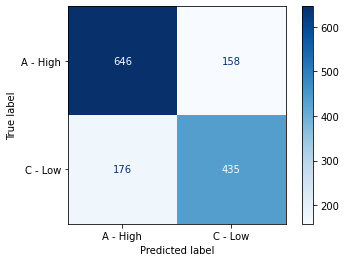

In [56]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
plot_confusion_matrix(model.fit(X_train, Y_train),X_validation,Y_validation,cmap=plt.cm.Blues)
print(classification_report(Y_validation, predictions))

In [57]:
# Make predictions on validation dataset with RF
 
model2 = RandomForestClassifier(criterion='gini', n_estimators=10000, n_jobs=2)
model2.fit(X_train, Y_train)
predictions2 = model2.predict(X_validation)

KeyboardInterrupt: 

In [ ]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions2))
plot_confusion_matrix(model2.fit(X_train, Y_train),X_validation,Y_validation,cmap=plt.cm.Blues)
print(classification_report(Y_validation, predictions2))

In [ ]:
feature_importance = model2.feature_importances_

sorted_idx = np.argsort(feature_importance)[::-1]
print("Feature Importance:\n")
for i in range(len(X.columns)):
    idx = sorted_idx[i]
    print(f'{X.columns[idx]:20} {feature_importance[idx]:.3f}')